In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from pandas.util.testing import assert_frame_equal

In [3]:
assets = ['T', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2017-1-1')['Adj Close']
pf_data.tail()

,T,^GSPC
Date,,
2020-06-03,31.510000,3122.870117
2020-06-04,31.799999,3112.350098
2020-06-05,32.770000,3193.929932
2020-06-08,33.230000,3232.389893
2020-06-09,32.615002,3208.520020


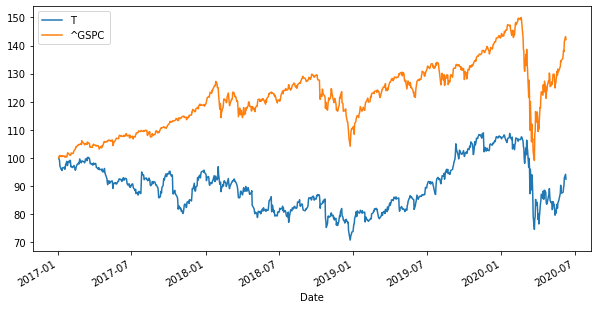

In [4]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [5]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [6]:
# average
log_returns.mean() * 250

T       -0.022834
^GSPC    0.101798
dtype: float64

In [7]:
# covariance
log_returns.cov() * 250

,T,^GSPC
T,0.063839,0.034728
^GSPC,0.034728,0.043256


In [8]:
# correlation matrices
log_returns.corr()

,T,^GSPC
T,1.00000,0.66086
^GSPC,0.66086,1.00000


In [9]:
num_assets = len(assets)

In [10]:
#verify the number of assets
num_assets

2

In [11]:
arr = np.random.random(2)
arr

array([0.04580506, 0.92452052])

In [12]:
arr[0] + arr [1]

0.9703255831027472

In [13]:
# Obtain two randomly generated weights whose sum will always equal one
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.35335001, 0.64664999])

In [14]:
weights[0] + weights[1]

1.0

In [15]:
np.sum(weights * log_returns.mean()) * 250

0.05775906824563072

In [16]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2047652086619607

In [17]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2047652086619607

In [18]:
# Create two lists of randomly generated expected returns:
pfolio_returns = []
pfolio_volatilities = []

# Create a loop that is set to randomly generate two weights: We are considering 1,000 different combinations of the same assets here!
# The idea is to compare the two and decide which one is more efficient:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([-0.010123288306628201,
  0.07360164504479692,
  0.08498678021332745,
  0.047529195007875745,
  0.03565722896954862,
  0.03045099791405187,
  0.04151450840112815,
  0.06801283801629389,
  0.030507577452133578,
  0.004653637520649736,
  0.058327763110942926,
  0.07039021987819889,
  0.02922892334357949,
  -0.012748903269610168,
  0.06351774280447463,
  -0.021845755300785044,
  0.008841050226289943,
  0.0319026925026923,
  0.034829104394463496,
  0.028525654359982968,
  0.08300856150890105,
  0.06289574488360919,
  0.07371147192861628,
  0.041539623924657335,
  -0.02053612295030284,
  0.007424667618698184,
  0.04369973508149413,
  0.009277257710077175,
  -0.016151177703288572,
  0.03503887351528255,
  0.04055352232836961,
  0.02972444536340299,
  0.09736700961570145,
  0.015391702317695172,
  0.037428892000372374,
  0.026707656254204164,
  0.08234373131363461,
  0.0766930270421076,
  -0.00044603744426609406,
  0.02725913860411194,
  0.01894457495178574,
  0.07935821232157161,
  0.051264

In [19]:
# Convert these lists into NumPy Arrays, revealing an alternative method to display the data
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([-0.01012329,  0.07360165,  0.08498678,  0.0475292 ,  0.03565723,
         0.030451  ,  0.04151451,  0.06801284,  0.03050758,  0.00465364,
         0.05832776,  0.07039022,  0.02922892, -0.0127489 ,  0.06351774,
        -0.02184576,  0.00884105,  0.03190269,  0.0348291 ,  0.02852565,
         0.08300856,  0.06289574,  0.07371147,  0.04153962, -0.02053612,
         0.00742467,  0.04369974,  0.00927726, -0.01615118,  0.03503887,
         0.04055352,  0.02972445,  0.09736701,  0.0153917 ,  0.03742889,
         0.02670766,  0.08234373,  0.07669303, -0.00044604,  0.02725914,
         0.01894457,  0.07935821,  0.0512646 ,  0.0183515 ,  0.07091808,
         0.04364643,  0.0304113 ,  0.03671933,  0.05090497,  0.07717526,
         0.03117101, -0.00011786,  0.09995413,  0.0435773 ,  0.0980509 ,
         0.08371246,  0.03052334,  0.02353855,  0.03978775,  0.05059871,
         0.0039923 ,  0.05625679,  0.05103255,  0.07707381,  0.05164639,
         0.07351232, -0.00572988,  0.00281981,  0.0

In [20]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [21]:
# Display the first five entries
portfolios.head()

,Return,Volatility
0,-0.010123,0.241439
1,0.073602,0.203283
2,0.084987,0.204060
3,0.047529,0.207282
4,0.035657,0.211672


In [22]:
# Display the last five entries
portfolios.tail()

,Return,Volatility
995,0.085729,0.204164
996,-0.014110,0.244843
997,0.068287,0.203448
998,0.033729,0.212528
999,0.025855,0.216422


Text(0, 0.5, 'Expected Return')

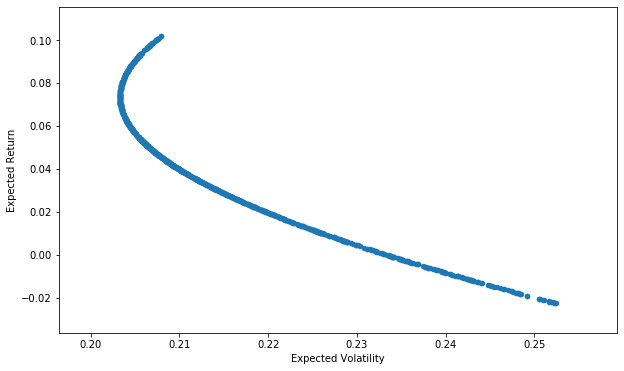

In [23]:
# Use Matplotlib to create a scatter plot of Expected Volatility and Expected Return
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')